In [1]:
from src import download_kaggle, DataPreprocessor, MLModel, EvaluateModel

In [2]:
cfg = download_kaggle()
print(cfg)

2022-04-26 22:18:46,232 (WARNING): Running DVC command: 'dvc run -n download_kaggle ...'
NodeConfig(params={'dataset': 'datamunge/sign-language-mnist'}, outs=WindowsPath('dataset'), outs_no_cache=None, outs_persist=None, outs_persist_no_cache=None, metrics=None, metrics_no_cache=None, deps=None, plots=None, plots_no_cache=None)


In [3]:
train_data = DataPreprocessor(data=cfg.outs, dataset="sign_mnist_train")
train_data.write_graph()

2022-04-26 22:18:47,454 (WARNING): Running DVC command: 'dvc run -n DataPreprocessor ...'


In [4]:
ml_model = MLModel(train_data=train_data, epochs=10, filters=[4], dense=[4])
ml_model.write_graph()

2022-04-26 22:18:48,725 (WARNING): Running DVC command: 'dvc run -n MLModel ...'


In [5]:
test_data = DataPreprocessor(data=cfg.outs, dataset="sign_mnist_test", name="test_data")
test_data.write_graph()

2022-04-26 22:18:49,955 (WARNING): Running DVC command: 'dvc run -n test_data ...'


In [6]:
EvaluateModel(ml_model=ml_model @ "model", test_data=test_data).write_graph()

2022-04-26 22:18:51,167 (WARNING): Running DVC command: 'dvc run -n EvaluateModel ...'
2022-04-26 22:18:52,332 (WARNING): Running DVC command: 'dvc plots modify nodes/EvaluateModel/confusion_matrix.csv ...'


In [7]:
!dvc dag

               +-----------------+              
               | download_kaggle |              
               +-----------------+              
                ***            ***              
              **                  ***           
            **                       **         
+------------------+                   **       
| DataPreprocessor |                    *       
+------------------+                    *       
          *                             *       
          *                             *       
          *                             *       
    +---------+                  +-----------+  
    | MLModel |                  | test_data |  
    +---------+*                 +-----------+  
                ***            ***              
                   **        **                 
                     **    **                   
                +---------------+               
                | EvaluateModel |               
                +---

# Post Processing
The following is done after calling `dvc repro`

In [8]:
ev = EvaluateModel.load()

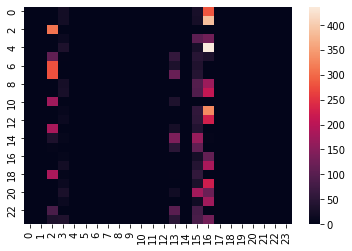

In [9]:
ev.plot_confusion_matrix()

In [10]:
DataPreprocessor["test_data"].features.shape

(7172, 28, 28, 1)

In [11]:
DataPreprocessor.load().features.shape

(27455, 28, 28, 1)